## Questions

### Question 1: 

Does the perceived healthiness of green and black tea change after consumption?

* Who (population): 150 participants between 18 and 46 years old (50% male and 50% female)
* What (subject, discipline): Marketing, Psychology (consumer perception)
* Where (location): Universidad de los Andes campus 
* When (snapshot, longitudinal): Snapshot study - collected at a single point in time
* How much data do you need to do the analysis/work: The dataset includes responses from 150 participants, which is enough for Repeated Measures ANOVA analysis.

### Question 2: 

Does the order of tasting (dark tea first vs. green tea first) influence the perception of healthiness?

* Who (population): 150 participants between 18 and 46 years old (50% male and 50% female)
* What (subject, discipline): Marketing, Psychology (consumer perception)
* Where (location): Universidad de los Andes campus
* When (snapshot, longitudinal): Snapshot study - collected at a single point in time
* How much data do you need to do the analysis/work: The dataset includes responses from 150 participants, with balanced groups for order of tasting, allowing for comparative analysis.


### Who Might Collect Relevant Data / What Articles or Publications Cite a Relevant Data Set?

Relevant data might be collected by researchers in marketing and/or consumer psychology. Academic journals such as the Journal of Consumer Research, Journal of Marketing Research, and Appetite (focused on food perception) may cite relevant datasets related to the effect of color on product perception and consumer preferences.

## Data Set and Documentation

1. Name / Title: Green Tea or Black Tea? Analyzing Consumer Perception in JASP Using Repeated Measurement ANOVA
2. [Link to Data](https://methods.sagepub.com/dataset/repeated-measurement-anova-consumer-perception)
3. Source / Origin: 
	* Author or Creator: Dakduk Silvana, Santalla-Banderali Zuleima
	* Publication Date: 2023
	* Publisher: Sage Publications
	* Version or Data Accessed: Feb 2025
4. License: Not Listed
5. Can You Use this Data Set for Your Intended Use Case? The dataset seems to be suitable for analyzing the effect of color on consumer perception of healthiness in tea products using Repeated Measures ANOVA

## Extract / Transform Data

### **Extraction**
The dataset contains several columns, but I chose to extract the following:
1. **Perceived Healthiness (After Consumption) [Numeric]** - Participants' rating of tea healthiness after consumption.  
2. **Tea Version (Categorical)** - Whether the tea was the green or dark version.  
3. **Tasting Order (Categorical)** - Whether the participant tasted green tea first or dark tea first.
4. **Participant ID (String)** - Unique identifier for each participant.  

### **Transformation**  
- Convert **Tea Version** from categorical values ("Green", "Dark") to numerical representation (e.g., Green → 0, Dark → 1).  
- Convert **Tasting Order** from categorical values ("Green First", "Dark First") to numerical representation (e.g., Green First → 0, Dark First → 1).
- Convert **Perceived Healthiness** ratings to float for numerical analysis.  
- Ensure **Participant ID** is stored as a string to prevent unintended operations.  

### **Cleaning**  
- **Handling Missing Values:**  
  - If **Perceived Healthiness** is missing, replace it with the median value of that tea version group.  
  - Drop rows with missing **Participant IDs** if they cannot be recovered.  
- **Normalization:**  
  - Standardize casing for categorical variables (e.g., "green" vs. "Green" → "Green").  
- **Type Consistency:**  
  - Convert numeric columns to appropriate Python types (e.g., `float` for ratings).  

In [9]:
import csv

# Define file path relative to project root
file_path = "../data/raw/repeated-measurement-anova-consumer-perception.csv"

# Storage for extracted data
data = {
    "presentation_order": [],
    "age": [],
    "gender": [],
    "eval_healthy_blacktea": [],
    "eval_healthy_greentea": []
}

# Read and process the CSV file
with open(file_path, newline='', encoding='utf-8') as f:
    reader = csv.reader(f, delimiter=';')
    header = next(reader)  # Skip the header row
    
    for row in reader:
        presentation_order = row[0].strip()
        age = int(row[1].strip()) if row[1].strip().isdigit() else None
        gender = row[2].strip()
        eval_healthy_blacktea = row[12].strip()
        eval_healthy_greentea = row[22].strip()

        # Handle missing values for healthiness ratings
        eval_healthy_blacktea = float(eval_healthy_blacktea) if eval_healthy_blacktea else None
        eval_healthy_greentea = float(eval_healthy_greentea) if eval_healthy_greentea else None
        
        # Store transformed data
        data["presentation_order"].append(presentation_order)
        data["age"].append(age)
        data["gender"].append(gender)
        data["eval_healthy_blacktea"].append(eval_healthy_blacktea)
        data["eval_healthy_greentea"].append(eval_healthy_greentea)

# Print sample data
print(f"Sample Data: {list(zip(data['presentation_order'][:5], data['age'][:5], data['gender'][:5], data['eval_healthy_blacktea'][:5], data['eval_healthy_greentea'][:5]))}")

Sample Data: [('GreenTea_BlackTea', 18, 'Female', 4.0, 2.0), ('BlackTea_GreenTea', 20, 'Female', 2.0, 3.0), ('BlackTea_GreenTea', 20, 'Female', 4.0, 3.0), ('GreenTea_BlackTea', 20, 'Female', 3.0, 5.0), ('GreenTea_BlackTea', 20, 'Female', 3.0, 5.0)]


## Descriptive Statistics

### Analysis on Numeric Data

#### Central Tendency

In [10]:
import numpy as np

# Extract numeric column while ignoring None values
eval_healthy_blacktea = [x for x in data["eval_healthy_blacktea"] if x is not None]
eval_healthy_greentea = [x for x in data["eval_healthy_greentea"] if x is not None]

def calculate_statistics(values, label):
    if not values:
        print(f"{label}: No valid data available")
        return
    
    # Calculate mean
    mean_value = sum(values) / len(values)

    # Calculate median
    sorted_data = sorted(values)
    n = len(sorted_data)
    if n % 2 == 0:
        median_value = (sorted_data[n//2 - 1] + sorted_data[n//2]) / 2
    else:
        median_value = sorted_data[n//2]

    # Calculate mode manually
    frequency_dict = {}
    for value in values:
        frequency_dict[value] = frequency_dict.get(value, 0) + 1

    mode_value = max(frequency_dict, key=frequency_dict.get)

    print(f"{label} - Mean: {mean_value:.2f}, Median: {median_value:.2f}, Mode: {mode_value}")

# Calculate and print statistics for both tea types
calculate_statistics(eval_healthy_blacktea, "Black Tea Healthiness")
calculate_statistics(eval_healthy_greentea, "Green Tea Healthiness")

Black Tea Healthiness - Mean: 3.26, Median: 3.00, Mode: 2.0
Green Tea Healthiness - Mean: 3.83, Median: 4.00, Mode: 2.0


#### Dispersion

In [4]:
# Calculate variance and standard deviation manually for EVAL_Healthy_BlackTea
mean_blacktea = sum(eval_healthy_blacktea) / len(eval_healthy_blacktea)
variance_blacktea = sum((x - mean_blacktea) ** 2 for x in eval_healthy_blacktea) / (len(eval_healthy_blacktea) - 1)
std_dev_blacktea = variance_blacktea ** 0.5  # Square root of variance

print(f"Black Tea - Variance: {variance_blacktea:.2f}")
print(f"Black Tea - Standard Deviation: {std_dev_blacktea:.2f}")

# Calculate variance and standard deviation manually for EVAL_Healthy_GreenTea
mean_greentea = sum(eval_healthy_greentea) / len(eval_healthy_greentea)
variance_greentea = sum((x - mean_greentea) ** 2 for x in eval_healthy_greentea) / (len(eval_healthy_greentea) - 1)
std_dev_greentea = variance_greentea ** 0.5  # Square root of variance

print(f"Green Tea - Variance: {variance_greentea:.2f}")
print(f"Green Tea - Standard Deviation: {std_dev_greentea:.2f}")

Black Tea - Variance: 1.75
Black Tea - Standard Deviation: 1.32
Green Tea - Variance: 2.64
Green Tea - Standard Deviation: 1.62


#### Outliers

In [5]:
# Identify min and max for EVAL_Healthy_BlackTea
min_blacktea = np.min(eval_healthy_blacktea)
max_blacktea = np.max(eval_healthy_blacktea)

print(f"Black Tea - Min Value: {min_blacktea}, Max Value: {max_blacktea}")

# Identify min and max for EVAL_Healthy_GreenTea
min_greentea = np.min(eval_healthy_greentea)
max_greentea = np.max(eval_healthy_greentea)

print(f"Green Tea - Min Value: {min_greentea}, Max Value: {max_greentea}")

Black Tea - Min Value: 1.0, Max Value: 7.0
Green Tea - Min Value: 1.0, Max Value: 7.0


###  Analysis on Categorical Data

#### Frequency

In [6]:
# Convert tea version and tasting order to numpy arrays while ignoring None values
tea_version_array = np.array([x for x in data["presentation_order"] if x is not None])
tasting_order_array = np.array([x for x in data["gender"] if x is not None])

# Get unique values and their counts
unique_tea_versions, tea_version_counts = np.unique(tea_version_array, return_counts=True)
unique_tasting_orders, tasting_order_counts = np.unique(tasting_order_array, return_counts=True)

# Print results
print("Presentation Order Frequency:", dict(zip(unique_tea_versions, tea_version_counts)))
print("Gender Frequency:", dict(zip(unique_tasting_orders, tasting_order_counts)))

Presentation Order Frequency: {'BlackTea_GreenTea': 73, 'GreenTea_BlackTea': 77}
Gender Frequency: {'Female': 75, 'Male': 75}


#### Unique Values

In [7]:
# Print unique values for Presentation Order and Gender
print("Unique Presentation Orders:", np.unique(tea_version_array))
print("Unique Genders:", np.unique(tasting_order_array))

Unique Presentation Orders: ['BlackTea_GreenTea' 'GreenTea_BlackTea']
Unique Genders: ['Female' 'Male']


## Visualizations

1. Distribution of Perceived Healthiness Ratings (Black Tea)

* This histogram shows how participants rated the healthiness of Black Tea.
* The x-axis represents the perceived healthiness ratings, ranging from 1 (did not enjoy) to 7 (enjoy). The y-axis represents the frequency of participants giving each rating.
* The distribution appears to have peaks around ratings 2, 3, and 4, suggesting most participants rated Black Tea in this range.

2. Distribution of Perceived Healthiness Ratings (Green Tea)

* This histogram displays the perceived healthiness ratings for Green Tea.
* Similar to the first graph, the x-axis represents the rating scale from 1 to 7, while the y-axis shows the frequency of ratings.
* The distribution appears to be more spread out compared to Black Tea, with peaks at ratings 2, 3, and 6.

3. Frequency of Presentation Orders

* This bar chart visualizes the number of participants assigned to each tasting order condition.
* The x-axis represents the two tasting order conditions: "BlackTea_GreenTea" and "GreenTea_BlackTea." The y-axis represents the number of participants in each group.
* The nearly equal height of the bars suggests that participants were evenly distributed across both conditions, ensuring balance in the study design.

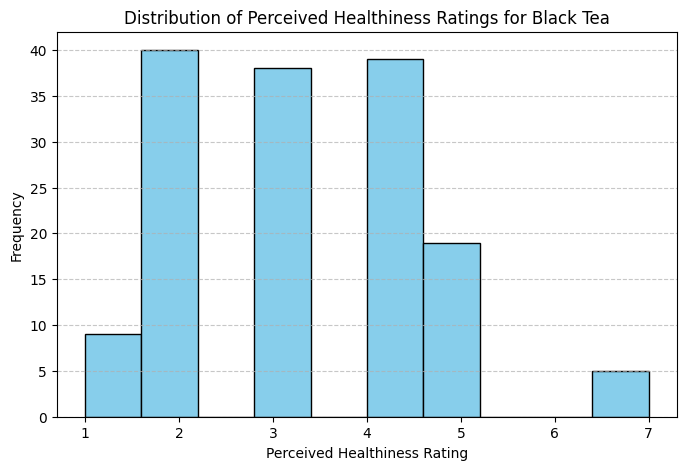

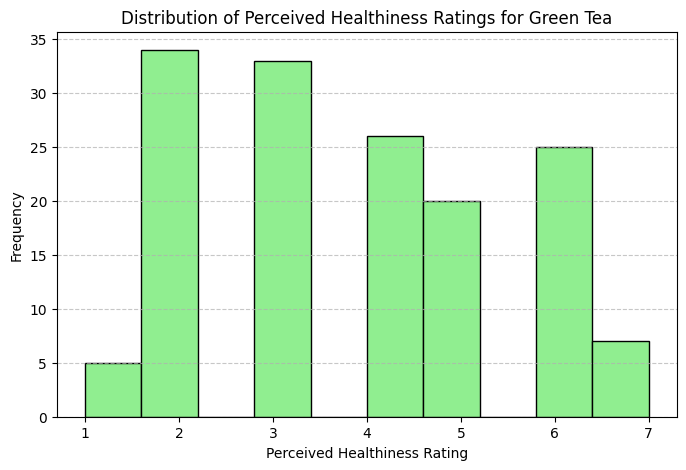

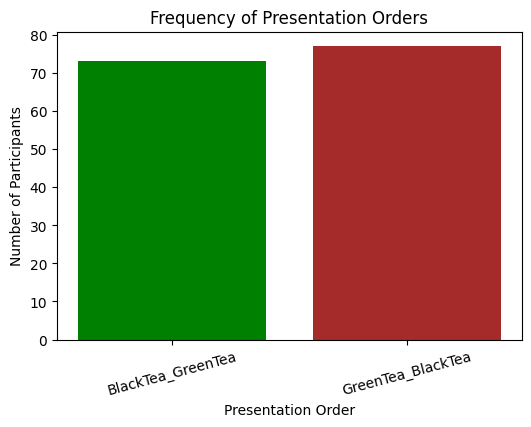

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Histogram: Distribution of Perceived Healthiness Ratings for Black Tea
plt.figure(figsize=(8, 5))
plt.hist(data["eval_healthy_blacktea"], bins=10, color='skyblue', edgecolor='black')
plt.xlabel("Perceived Healthiness Rating")
plt.ylabel("Frequency")
plt.title("Distribution of Perceived Healthiness Ratings for Black Tea")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Histogram: Distribution of Perceived Healthiness Ratings for Green Tea
plt.figure(figsize=(8, 5))
plt.hist(data["eval_healthy_greentea"], bins=10, color='lightgreen', edgecolor='black')
plt.xlabel("Perceived Healthiness Rating")
plt.ylabel("Frequency")
plt.title("Distribution of Perceived Healthiness Ratings for Green Tea")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Bar Chart: Frequency of Presentation Orders
presentation_order_array = np.array([x for x in data["presentation_order"] if x is not None])

if len(presentation_order_array) > 0:
    unique_orders, order_counts = np.unique(presentation_order_array, return_counts=True)

    plt.figure(figsize=(6, 4))
    plt.bar(unique_orders, order_counts, color=["green", "brown"])
    plt.xlabel("Presentation Order")
    plt.ylabel("Number of Participants")
    plt.title("Frequency of Presentation Orders")
    plt.xticks(rotation=15)
    plt.show()
else:
    print("No valid presentation order data available.")

## Conclusion

The results from the graphs suggest that the color of the tea influences participants perception of healthiness. Green Tea, with its lighter color, is assumed to be as slightly healthier than Black Tea, given the wider spread of ratings and peaks in the higher range. On the other hand, Black Tea, with its darker color, seems to have a more concentrated distribution, with most ratings clustering around the middle values. 

The balanced distribution of participants in the tasting order conditions ensures that any differences in ratings are less likely due to order effects, making the results more reliable.

These findings help address my original question regarding perceived healthiness: Green Tea tends to be rated as healthier, but the overlap in ratings suggests that individual preferences and perceptions still play a role. Further analysis could examine whether specific demographic factors, such as age, influence these perceptions.